In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
import tensorflow as tf
import scipy.io
import statistics
from sklearn.metrics import roc_curve, auc # type: ignore
from sklearn.metrics import roc_auc_score # type: ignore


n_u = 20                       # Length of current input window
n_l = 4                        # Number of lagged (historical) inputs
n_h = n_u + n_l                # Total input length = current + lagged
hidden_unit = int(np.ceil(np.sqrt((n_u + 1) * n_l + 1) + 10))  # Empirical formula for hidden units
test_size = 220               # Number of test samples (220 test signals in total)
batch_size = 256              # Batch size for training
OUT_STEPS = 20                # Number of steps to predict ahead (closed-loop structure)
tail = n_h + OUT_STEPS        # Trimmed tail length where prediction is not possible
initial_learning_rate = 1e-3  # Initial learning rate
decay_rate = 0.99             # Learning rate decay (currently unused)
max_epochs = 50               # Maximum number of training epochs (recommend: increase to 10000)
detect_test_every = 10        # Frequency (in epochs) to run AUC evaluation (recommend: increase to 1000)


In [4]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [5]:

def TestDetection(model):
    error_absolute_5db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_10db = np.zeros ((test_defect_5db.shape[1], test_size))
    error_absolute_15db = np.zeros ((test_defect_5db.shape[1], test_size))
    error_absolute_20db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_25db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_30db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    residual_absolute = np.zeros ((test_defect_5db.shape[1], test_size))

    defect_signals_5db = test_defect_5db.flatten()
    defect_signals_10db = test_defect_10db.flatten()
    defect_signals_15db = test_defect_15db.flatten()
    defect_signals_20db = test_defect_20db.flatten()
    defect_signals_25db = test_defect_25db.flatten()
    defect_signals_30db = test_defect_30db.flatten()
    df_signals = test_signals.flatten()

    test_len =len(defect_signals_5db)- n_h -OUT_STEPS+1

    x_defect_5db = np.zeros ((test_len, n_h))
    y_defect_5db = np.zeros ((test_len, 1))

    x_defect_10db = np.zeros ((test_len, n_h))
    y_defect_10db = np.zeros ((test_len, 1))

    x_defect_15db = np.zeros ((test_len, n_h))
    y_defect_15db = np.zeros ((test_len, 1))

    x_defect_20db = np.zeros ((test_len, n_h))
    y_defect_20db = np.zeros ((test_len, 1))

    x_defect_25db = np.zeros ((test_len, n_h))
    y_defect_25db = np.zeros ((test_len, 1))

    x_defect_30db = np.zeros ((test_len, n_h))
    y_defect_30db = np.zeros ((test_len, 1))

    x_df = np.zeros ((test_len, n_h))
    y_df = np.zeros ((test_len, 1))

    for j in range(n_h):
    
        x_defect_5db[:,j] = defect_signals_5db[j:j+test_len]
        x_defect_10db[:,j] = defect_signals_10db[j:j+test_len]
        x_defect_15db[:,j] = defect_signals_15db[j:j+test_len]
        x_defect_20db[:,j] = defect_signals_20db[j:j+test_len]
        x_defect_25db[:,j] = defect_signals_25db[j:j+test_len]
        x_defect_30db[:,j] = defect_signals_30db[j:j+test_len]
        x_df[:,j] = df_signals[j:j+test_len]

    y_defect_5db[:,0] = defect_signals_5db[-test_len::]
    y_defect_10db[:,0] = defect_signals_10db[-test_len::]
    y_defect_15db[:,0] = defect_signals_15db[-test_len::]
    y_defect_20db[:,0] = defect_signals_20db[-test_len::]
    y_defect_25db[:,0] = defect_signals_25db[-test_len::]
    y_defect_30db[:,0] = defect_signals_30db[-test_len::]
    y_df[:,0] = df_signals[-test_len::]

    x_defect_5db = tf.convert_to_tensor(x_defect_5db, dtype=tf.float32)
    y_defect_5db = tf.convert_to_tensor(y_defect_5db, dtype=tf.float32)
    x_defect_10db = tf.convert_to_tensor(x_defect_10db, dtype=tf.float32)
    y_defect_10db = tf.convert_to_tensor(y_defect_10db, dtype=tf.float32)
    x_defect_15db = tf.convert_to_tensor(x_defect_15db, dtype=tf.float32)
    y_defect_15db = tf.convert_to_tensor(y_defect_15db, dtype=tf.float32)
    x_defect_20db = tf.convert_to_tensor(x_defect_20db, dtype=tf.float32)
    y_defect_20db = tf.convert_to_tensor(y_defect_20db, dtype=tf.float32)
    x_defect_25db = tf.convert_to_tensor(x_defect_25db, dtype=tf.float32)
    y_defect_25db = tf.convert_to_tensor(y_defect_25db, dtype=tf.float32)
    x_defect_30db = tf.convert_to_tensor(x_defect_30db, dtype=tf.float32)
    y_defect_30db = tf.convert_to_tensor(y_defect_30db, dtype=tf.float32)
    x_df = tf.convert_to_tensor(x_df, dtype=tf.float32)
    y_df = tf.convert_to_tensor(y_df, dtype=tf.float32)

    predicted_baseline_5db = model.predict(x_defect_5db)
    predicted_baseline_10db = model.predict(x_defect_10db)
    predicted_baseline_15db = model.predict(x_defect_15db)
    predicted_baseline_20db = model.predict(x_defect_20db)
    predicted_baseline_25db = model.predict(x_defect_25db)
    predicted_baseline_30db = model.predict(x_defect_30db)
    baseline_df = model.predict(x_df)

    df_residual = y_df - baseline_df
    df_residual = np.asarray(tf.squeeze(df_residual))
    df_residual = df_residual[-(test_size-1)*test_defect_5db.shape[1]:]
    df_residual = df_residual - statistics.mean(df_residual)

    defect_error_5db = np.asarray(y_defect_5db) - predicted_baseline_5db
    defect_error_5db = np.asarray(tf.squeeze(defect_error_5db))
    defect_error_5db = defect_error_5db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_5db = defect_error_5db - statistics.mean(defect_error_5db)

    defect_error_10db = np.asarray(y_defect_10db) - predicted_baseline_10db
    defect_error_10db = np.asarray(tf.squeeze(defect_error_10db))
    defect_error_10db = defect_error_10db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_10db = defect_error_10db - statistics.mean(defect_error_10db)

    defect_error_15db = np.asarray(y_defect_15db) - predicted_baseline_15db
    defect_error_15db = np.asarray(tf.squeeze(defect_error_15db))
    defect_error_15db = defect_error_15db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_15db = defect_error_15db - statistics.mean(defect_error_15db)

    defect_error_20db = np.asarray(y_defect_20db) - predicted_baseline_20db
    defect_error_20db = np.asarray(tf.squeeze(defect_error_20db))
    defect_error_20db = defect_error_20db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_20db = defect_error_20db - statistics.mean(defect_error_20db)

    defect_error_25db = np.asarray(y_defect_25db) - predicted_baseline_25db
    defect_error_25db = np.asarray(tf.squeeze(defect_error_25db))
    defect_error_25db = defect_error_25db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_25db = defect_error_25db - statistics.mean(defect_error_25db)

    defect_error_30db = np.asarray(y_defect_30db) - predicted_baseline_30db
    defect_error_30db = np.asarray(tf.squeeze(defect_error_30db))
    defect_error_30db = defect_error_30db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_30db = defect_error_30db - statistics.mean(defect_error_30db)

    for k in range(test_size-1):
        error_absolute_5db [:,k] = defect_error_5db[k*test_defect_5db.shape[1]: (k+1)*test_defect_5db.shape[1]] *scale_defect_5db
        error_absolute_5db [:,k] = np.multiply(error_absolute_5db [:,k], scale[k])
        error_absolute_5db [:,k] = abs(error_absolute_5db [:,k])

        error_absolute_10db [:,k] = defect_error_10db[k*test_defect_10db.shape[1]: (k+1)*test_defect_10db.shape[1]] *scale_defect_10db
        error_absolute_10db [:,k] = np.multiply(error_absolute_10db [:,k], scale[k])
        error_absolute_10db [:,k] = abs(error_absolute_10db [:,k])

        error_absolute_15db [:,k] = defect_error_15db[k*test_defect_15db.shape[1]: (k+1)*test_defect_15db.shape[1]] *scale_defect_15db
        error_absolute_15db [:,k] = np.multiply(error_absolute_15db [:,k], scale[k])
        error_absolute_15db [:,k] = abs(error_absolute_15db [:,k])

        error_absolute_20db [:,k] = defect_error_20db[k*test_defect_20db.shape[1]: (k+1)*test_defect_20db.shape[1]] *scale_defect_20db
        error_absolute_20db [:,k] = np.multiply(error_absolute_20db [:,k], scale[k])
        error_absolute_20db [:,k] = abs(error_absolute_20db [:,k])

        error_absolute_25db [:,k] = defect_error_25db[k*test_defect_25db.shape[1]: (k+1)*test_defect_25db.shape[1]] *scale_defect_25db
        error_absolute_25db [:,k] = np.multiply(error_absolute_25db [:,k], scale[k])
        error_absolute_25db [:,k] = abs(error_absolute_25db [:,k])

        error_absolute_30db [:,k] = defect_error_30db[k*test_defect_30db.shape[1]: (k+1)*test_defect_30db.shape[1]] *scale_defect_30db
        error_absolute_30db [:,k] = np.multiply(error_absolute_30db [:,k], scale[k])
        error_absolute_30db [:,k] = abs(error_absolute_30db [:,k])
    
        residual_absolute [:,k] = df_residual[k*test_defect_5db.shape[1]: (k+1)*test_defect_5db.shape[1]] 
        residual_absolute [:,k] = np.multiply(residual_absolute [:,k], scale[k])
        residual_absolute [:,k] = abs(residual_absolute [:,k])

    error_absolute_5db = error_absolute_5db [-error_len:-5,:]
    error_absolute_10db = error_absolute_10db [-error_len:-5,:]
    error_absolute_15db = error_absolute_15db [-error_len:-5,:]
    error_absolute_20db = error_absolute_20db [-error_len:-5,:]
    error_absolute_25db = error_absolute_25db [-error_len:-5,:]
    error_absolute_30db = error_absolute_30db [-error_len:-5,:]
    residual_absolute = residual_absolute [-error_len:-5,:]
    
    max_residual = np.amax(residual_absolute, axis = 0)
    max_error_5db = np.amax(error_absolute_5db, axis = 0)
    max_error_10db = np.amax(error_absolute_10db, axis = 0)
    max_error_15db = np.amax(error_absolute_15db, axis = 0)
    max_error_20db = np.amax(error_absolute_20db, axis = 0)
    max_error_25db = np.amax(error_absolute_25db, axis = 0)
    max_error_30db = np.amax(error_absolute_30db, axis = 0)
    
    scores_5db = np.concatenate((max_residual,max_error_5db))
    scores_10db = np.concatenate((max_residual,max_error_10db))
    scores_15db = np.concatenate((max_residual, max_error_15db))
    scores_20db = np.concatenate((max_residual,max_error_20db))
    scores_25db = np.concatenate((max_residual,max_error_25db))
    scores_30db = np.concatenate((max_residual,max_error_30db))
    label1 = np.zeros((len(max_residual)))
    label2 = np.ones((len(max_error_5db)))
    label = np.concatenate((label1, label2))
    PFA_5db, POD_5db, thresholds_5db = roc_curve(label, scores_5db)
    PFA_10db, POD_10db, thresholds_10db = roc_curve(label, scores_10db)
    PFA_15db, POD_15db, thresholds_15db = roc_curve(label, scores_15db)
    PFA_20db, POD_20db, thresholds_20db = roc_curve(label, scores_20db)
    PFA_25db, POD_25db, thresholds_25db = roc_curve(label, scores_25db)
    PFA_30db, POD_30db, thresholds_30db = roc_curve(label, scores_30db)
    
    roc_auc_5db = auc(PFA_5db, POD_5db)
    roc_auc_10db = auc(PFA_10db, POD_10db)
    roc_auc_15db = auc(PFA_15db, POD_15db)
    roc_auc_20db = auc(PFA_20db, POD_20db)
    roc_auc_25db = auc(PFA_25db, POD_25db)
    roc_auc_30db = auc(PFA_30db, POD_30db)

    square_error= np.square(residual_absolute).flatten()
    test_mse = np.mean(square_error, axis=0)
    return (
    [roc_auc_5db, roc_auc_10db, roc_auc_15db, roc_auc_20db, roc_auc_25db, roc_auc_30db, test_mse],
    residual_absolute,  
    error_absolute_30db,  
    PFA_5db, POD_5db, roc_auc_5db,
    PFA_10db, POD_10db, roc_auc_10db,
    PFA_15db, POD_15db, roc_auc_15db,
    PFA_20db, POD_20db, roc_auc_20db,
    PFA_25db, POD_25db, roc_auc_25db,
    PFA_30db, POD_30db, roc_auc_30db
)

    
f1 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\train_normalised.mat')
training_signals = np.array(f1['test_normalised'])


f2 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_normalised.mat')
test_signals = np.array(f2['test_normalised'])

training_samples = training_signals.flatten()
train_len = len(training_samples) - n_h -OUT_STEPS+1
error_len = test_signals.shape[1]-tail

x_train = np.zeros ((train_len, n_h))
y_train = np.zeros ((train_len, 1))

for i in range(train_len):
    x_train[i,:] = training_samples[i:(i+n_h)]
    y_train[i,:] = training_samples[(i+n_h+OUT_STEPS-1)]

x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

#Closed loop model

#Closed loop model
class FeedBack(tf.keras.Model):
    def __init__(self, hidden_units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.hidden_units = hidden_units

        self.hidden_layer = tf.keras.layers.Dense(hidden_units, activation='tanh')
        self.output_layer = tf.keras.layers.Dense(1, activation=None)

    def split(self, inputs):
        x = []
        for b in range(n_l):
            split_layer = tf.keras.layers.Lambda(lambda x: x[:, b:b + n_u + 1])(inputs)
            x.append(split_layer)
        return x

    def call(self, inputs, training=None):
        for n in range(self.out_steps):
            if n_l == 1:
                inp = inputs
            else:
                x = self.split(inputs)
                inp = tf.keras.layers.Concatenate(axis=-1)(x)
            hidden = self.hidden_layer(inp)
            output = self.output_layer(hidden)
            inputs = tf.concat((inputs[:, -n_h + 1:], output), axis=1)
        return output

model = FeedBack(hidden_units=hidden_unit, out_steps=OUT_STEPS)

#def sched(epoch,lr): #lr here is current lr, required as an input even if not used
    #return initial_learning_rate * np.power(decay_rate,epoch)
#lrsched = tf.keras.callbacks.LearningRateScheduler(sched, verbose=0)

def get_callbacks():
    early_stopping =  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",factor=0.2, patience=20, verbose=2)
    return (early_stopping, learning_rate_reduction)

model.compile(loss=[tf.losses.MeanSquaredError()], 
              metrics=[tf.metrics.MeanAbsoluteError()], 
              optimizer=tf.optimizers.Adam(learning_rate=initial_learning_rate))
 


In [6]:
#Load Test Data
"D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-5db.mat"
f3 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-5db.mat')
test_defect_5db = np.array(f3['test_defect'])
f4 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-10db.mat')
test_defect_10db = np.array(f4['test_defect'])
f5 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-20db.mat')
test_defect_20db = np.array(f5['test_defect'])
f6 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-25db.mat')
test_defect_25db = np.array(f6['test_defect'])
f7 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-30db.mat')
test_defect_30db = np.array(f7['test_defect'])
f9 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect_-15db.mat')
test_defect_15db = np.array(f9['test_defect'])
scale_defect_15db = np.amax(abs(test_defect_15db))
test_defect_15db = test_defect_15db / scale_defect_15db


f8 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_max.mat')
scale = np.array(f8['test_max'])
#scale = scale[0,0:test_size] # (1,220)
# (220,)
if scale.ndim == 2 and scale.shape[1] == 1:
    scale = scale[:, 0]
print("scale.shape:", scale.shape)
# 前 test_size 个
scale = scale[:test_size]

scale_defect_5db = np.amax(abs(test_defect_5db))
scale_defect_10db = np.amax(abs(test_defect_10db))
scale_defect_20db = np.amax(abs(test_defect_20db))
scale_defect_25db = np.amax(abs(test_defect_25db))
scale_defect_30db = np.amax(abs(test_defect_30db))

test_defect_5db = test_defect_5db/scale_defect_5db
test_defect_10db = test_defect_10db/scale_defect_10db
test_defect_20db = test_defect_20db/scale_defect_20db
test_defect_25db = test_defect_25db/scale_defect_25db
test_defect_30db = test_defect_30db/scale_defect_30db




scale.shape: (220,)


In [8]:
class AdditionalTests(tf.keras.callbacks.Callback):   #Create a callback
    def __init__(self, verbose=0, batch_size=None):
        super(AdditionalTests, self).__init__()
        self.epoch = []
        self.history = {}
        self.verbose = verbose
        self.batch_size = batch_size
        self.lr = []

    def on_train_begin(self, logs=None):
        self.epoch = []
        self.history = {}
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epoch.append(epoch)
        self.lr.append(self.model.optimizer.lr)

        # record the values currently in History (training and validation1)
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        # if np.mod(epoch,detect_test_every) == 0:
        #     # evaluate on the additional validation sets
        #     #plot_auc_vs_time(self.model, sampling_rate=5_000_000, win_ms=0.1)
        #     AUC = TestDetection(self.model)[0]
        #     for AUC1,valuename in zip(AUC,['auc_5db','auc_10db','auc_15db','auc_20db','auc_25db','auc_30db','test_mse']):
        #         self.history.setdefault(valuename, []).append(AUC1)
                           


In [9]:
history = AdditionalTests()
model.fit(x_train, y_train, epochs=max_epochs, batch_size=batch_size, validation_split=0.1, callbacks=[history], verbose=2)
model.summary()

#model.save('NARX_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}')  ###
#np.save('History_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}',history.history) ###
model.save('FF_NARX11_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}')
np.save('FF_History11_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}', history.history)


Epoch 1/50
414/414 - 6s - loss: 0.0025 - mean_absolute_error: 0.0240 - val_loss: 9.5236e-04 - val_mean_absolute_error: 0.0166 - 6s/epoch - 15ms/step
Epoch 2/50
414/414 - 4s - loss: 7.7790e-04 - mean_absolute_error: 0.0155 - val_loss: 7.3619e-04 - val_mean_absolute_error: 0.0153 - 4s/epoch - 10ms/step
Epoch 3/50
414/414 - 4s - loss: 7.3097e-04 - mean_absolute_error: 0.0151 - val_loss: 7.5978e-04 - val_mean_absolute_error: 0.0175 - 4s/epoch - 11ms/step
Epoch 4/50
414/414 - 5s - loss: 7.1224e-04 - mean_absolute_error: 0.0147 - val_loss: 7.0242e-04 - val_mean_absolute_error: 0.0142 - 5s/epoch - 11ms/step
Epoch 5/50
414/414 - 5s - loss: 7.0235e-04 - mean_absolute_error: 0.0146 - val_loss: 7.0617e-04 - val_mean_absolute_error: 0.0140 - 5s/epoch - 11ms/step
Epoch 6/50
414/414 - 5s - loss: 7.0404e-04 - mean_absolute_error: 0.0146 - val_loss: 7.0286e-04 - val_mean_absolute_error: 0.0143 - 5s/epoch - 11ms/step
Epoch 7/50
414/414 - 5s - loss: 6.9246e-04 - mean_absolute_error: 0.0145 - val_loss: 7

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


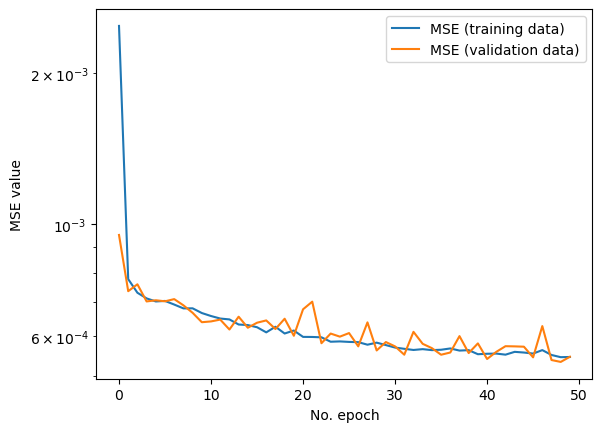

KeyError: 'test_mse'

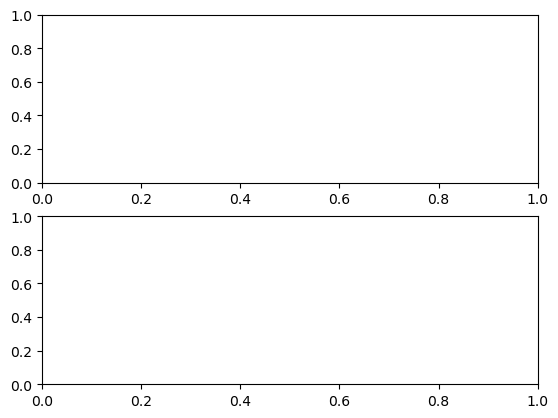

In [11]:
print(history.history.keys())
plt.figure()
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.yscale('log')
plt.legend(loc="upper right")
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.savefig('TrainGraph_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}')  ###
plt.show()

fig,(ax1,ax2) = plt.subplots(2,1)
ax1.plot(history.epoch[0::detect_test_every], history.history['test_mse'], label='MSE (test data)')

ax2.plot(history.epoch[0::detect_test_every], history.history['auc_5db'], ':', label='AUC (5dB)')
ax2.plot(history.epoch[0::detect_test_every], history.history['auc_10db'],  ':', label='AUC (10dB)')
ax2.plot(history.epoch[0::detect_test_every], history.history['auc_15db'],  ':', label='AUC (15dB)')
ax2.plot(history.epoch[0::detect_test_every], history.history['auc_20db'],  ':', label='AUC (20dB)') 
ax2.plot(history.epoch[0::detect_test_every], history.history['auc_25db'],  ':', label='AUC (25dB)')
ax2.plot(history.epoch[0::detect_test_every], history.history['auc_30db'],  ':', label='AUC (30dB)')
ax1.set_yscale('log')
#plt.title('Training performance')
ax1.set_ylabel('MSE (test data)')
ax2.set_ylabel('AUC')
ax2.set_ylim([0.5, 1])
ax1.set_xlabel('No. epoch')
ax2.set_xlabel('No. epoch')
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.savefig('HistoryGraph_nu'+f'{n_u}'+'_nl'+f'{n_l}'+'_out'+f'{OUT_STEPS}') ###
plt.show()

#plt.figure()
#plt.plot(history.lr)
#plt.title('Learning rate')
#plt.ylabel('LR')
#plt.xlabel('No. epoch')
#plt.savefig('LRGraphc'+f'{OUT_STEPS}'+f'{batch_size}')
#plt.show()

40424/40424 [==============================] - 181s 4ms/step
Final Evaluation Results
Test MSE: 0.982076
AUC  d1: 0.98207645
AUC d2: 0.98207645
AUC d3: 0.98034091
AUC d4: 0.74908058
AUC d5: 0.50379132
AUC d6: 0.50327479


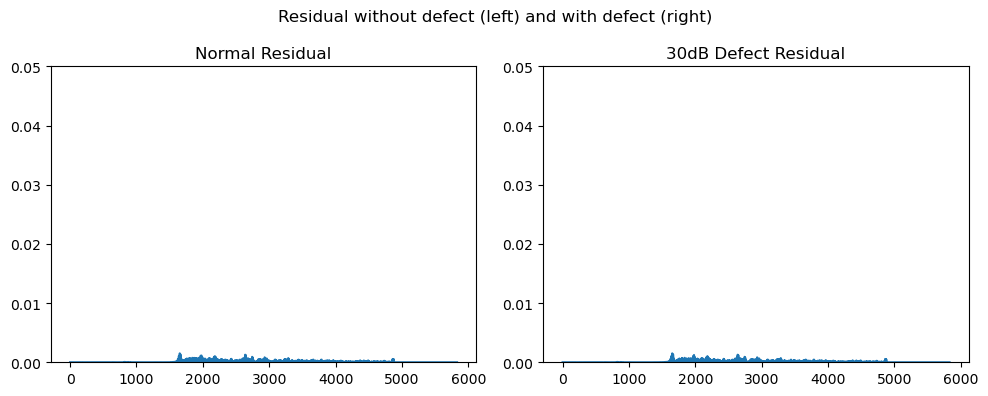

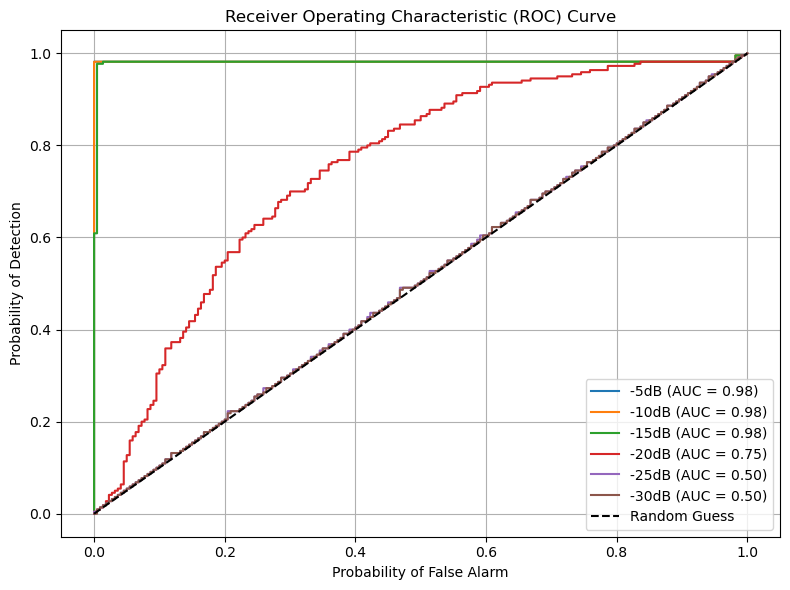

In [ ]:
results = TestDetection(model)

metrics, residual_absolute, error_absolute_30db, \
PFA_5db, POD_5db, roc_auc_5db, \
PFA_10db, POD_10db, roc_auc_10db, \
PFA_15db, POD_15db, roc_auc_15db, \
PFA_20db, POD_20db, roc_auc_20db, \
PFA_25db, POD_25db, roc_auc_25db, \
PFA_30db, POD_30db, roc_auc_30db = results

print("Final Evaluation Results")
print(f"Test MSE: {metrics[0]:.6f}")
print(f"AUC  d1: {roc_auc_5db:.8f}")
print(f"AUC d2: {roc_auc_10db:.8f}")
print(f"AUC d3: {roc_auc_15db:.8f}")
print(f"AUC d4: {roc_auc_20db:.8f}")
print(f"AUC d5: {roc_auc_25db:.8f}")
print(f"AUC d6: {roc_auc_30db:.8f}")

#residual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('Residual without defect (left) and with defect (right)')
ax1.plot(residual_absolute[:,10])
ax1.set_ylim([0, 0.05])
ax1.set_title("Normal Residual")
ax2.plot(error_absolute_30db[:,10])
ax2.set_ylim([0, 0.05])
ax2.set_title("30dB Defect Residual")
plt.tight_layout()
plt.show()

# ROC 
plt.figure(figsize=(8,6))
plt.plot(PFA_5db, POD_5db, label='-5dB (AUC = %.2f)'%roc_auc_5db)
plt.plot(PFA_10db, POD_10db, label='-10dB (AUC = %.2f)'%roc_auc_10db)
plt.plot(PFA_15db, POD_15db, label='-15dB (AUC = %.2f)'%roc_auc_15db)
plt.plot(PFA_20db, POD_20db, label='-20dB (AUC = %.2f)'%roc_auc_20db)
plt.plot(PFA_25db, POD_25db, label='-25dB (AUC = %.2f)'%roc_auc_25db)
plt.plot(PFA_30db, POD_30db, label='-30dB (AUC = %.2f)'%roc_auc_30db)
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Detection')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

results = TestDetection(model)

metrics, residual_absolute, error_absolute_30db, \
PFA_5db, POD_5db, roc_auc_5db, \
PFA_10db, POD_10db, roc_auc_10db, \
PFA_15db, POD_15db, roc_auc_15db, \
PFA_20db, POD_20db, roc_auc_20db, \
PFA_25db, POD_25db, roc_auc_25db, \
PFA_30db, POD_30db, roc_auc_30db = results

error_dict = {
    '5dB': error_absolute_5db,
    '10dB': error_absolute_10db,
    '15dB': error_absolute_15db,
    '20dB': error_absolute_20db,
    '25dB': error_absolute_25db,
    '30dB': error_absolute_30db,
}

for db, error_matrix in error_dict.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'Residual Comparison: Normal vs Defect ({db})', fontsize=14)


    ax1.plot(residual_absolute[:,10], label='Normal Residual')
    ax1.set_ylim([0, 0.05])
    ax1.set_title("Normal (No Defect)")

    ax2.plot(error_matrix[:,10], label=f'{db} Defect Residual', color='red')
    ax2.set_ylim([0, 0.05])
    ax2.set_title(f'Defect ({db})')

    for ax in (ax1, ax2):
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('Residual Amplitude')
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# 2. ROC 
plt.figure(figsize=(8,6))
plt.plot(PFA_5db, POD_5db, label='-5dB (AUC = %.2f)'%roc_auc_5db)
plt.plot(PFA_10db, POD_10db, label='-10dB (AUC = %.2f)'%roc_auc_10db)
plt.plot(PFA_15db, POD_15db, label='-15dB (AUC = %.2f)'%roc_auc_15db)
plt.plot(PFA_20db, POD_20db, label='-20dB (AUC = %.2f)'%roc_auc_20db)
plt.plot(PFA_25db, POD_25db, label='-25dB (AUC = %.2f)'%roc_auc_25db)
plt.plot(PFA_30db, POD_30db, label='-30dB (AUC = %.2f)'%roc_auc_30db)
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Detection')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Testing for the real signal data

In [ ]:
test_size = 4
def TestDetection2(model):
    error_absolute_5db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_10db = np.zeros ((test_defect_5db.shape[1], test_size))
    error_absolute_15db = np.zeros ((test_defect_5db.shape[1], test_size))
    error_absolute_20db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_25db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    error_absolute_30db = np.zeros ((test_defect_5db.shape[1], test_size)) 
    residual_absolute = np.zeros ((test_defect_5db.shape[1], test_size))

    defect_signals_5db = test_defect_5db.flatten()
    defect_signals_10db = test_defect_10db.flatten()
    defect_signals_15db = test_defect_15db.flatten()
    defect_signals_20db = test_defect_20db.flatten()
    defect_signals_25db = test_defect_25db.flatten()
    defect_signals_30db = test_defect_30db.flatten()
    df_signals = test_signals.flatten()

    test_len =len(defect_signals_5db)- n_h -OUT_STEPS+1

    x_defect_5db = np.zeros ((test_len, n_h))
    y_defect_5db = np.zeros ((test_len, 1))

    x_defect_10db = np.zeros ((test_len, n_h))
    y_defect_10db = np.zeros ((test_len, 1))

    x_defect_15db = np.zeros ((test_len, n_h))
    y_defect_15db = np.zeros ((test_len, 1))

    x_defect_20db = np.zeros ((test_len, n_h))
    y_defect_20db = np.zeros ((test_len, 1))

    x_defect_25db = np.zeros ((test_len, n_h))
    y_defect_25db = np.zeros ((test_len, 1))

    x_defect_30db = np.zeros ((test_len, n_h))
    y_defect_30db = np.zeros ((test_len, 1))

    x_df = np.zeros ((test_len, n_h))
    y_df = np.zeros ((test_len, 1))

    for j in range(n_h):
    
        x_defect_5db[:,j] = defect_signals_5db[j:j+test_len]
        x_defect_10db[:,j] = defect_signals_10db[j:j+test_len]
        x_defect_15db[:,j] = defect_signals_15db[j:j+test_len]
        x_defect_20db[:,j] = defect_signals_20db[j:j+test_len]
        x_defect_25db[:,j] = defect_signals_25db[j:j+test_len]
        x_defect_30db[:,j] = defect_signals_30db[j:j+test_len]
        x_df[:,j] = df_signals[j:j+test_len]

    y_defect_5db[:,0] = defect_signals_5db[-test_len::]
    y_defect_10db[:,0] = defect_signals_10db[-test_len::]
    y_defect_15db[:,0] = defect_signals_15db[-test_len::]
    y_defect_20db[:,0] = defect_signals_20db[-test_len::]
    y_defect_25db[:,0] = defect_signals_25db[-test_len::]
    y_defect_30db[:,0] = defect_signals_30db[-test_len::]
    y_df[:,0] = df_signals[-test_len::]

    x_defect_5db = tf.convert_to_tensor(x_defect_5db, dtype=tf.float32)
    y_defect_5db = tf.convert_to_tensor(y_defect_5db, dtype=tf.float32)
    x_defect_10db = tf.convert_to_tensor(x_defect_10db, dtype=tf.float32)
    y_defect_10db = tf.convert_to_tensor(y_defect_10db, dtype=tf.float32)
    x_defect_15db = tf.convert_to_tensor(x_defect_15db, dtype=tf.float32)
    y_defect_15db = tf.convert_to_tensor(y_defect_15db, dtype=tf.float32)
    x_defect_20db = tf.convert_to_tensor(x_defect_20db, dtype=tf.float32)
    y_defect_20db = tf.convert_to_tensor(y_defect_20db, dtype=tf.float32)
    x_defect_25db = tf.convert_to_tensor(x_defect_25db, dtype=tf.float32)
    y_defect_25db = tf.convert_to_tensor(y_defect_25db, dtype=tf.float32)
    x_defect_30db = tf.convert_to_tensor(x_defect_30db, dtype=tf.float32)
    y_defect_30db = tf.convert_to_tensor(y_defect_30db, dtype=tf.float32)
    x_df = tf.convert_to_tensor(x_df, dtype=tf.float32)
    y_df = tf.convert_to_tensor(y_df, dtype=tf.float32)

    predicted_baseline_5db = model.predict(x_defect_5db)
    predicted_baseline_10db = model.predict(x_defect_10db)
    predicted_baseline_15db = model.predict(x_defect_15db)
    predicted_baseline_20db = model.predict(x_defect_20db)
    predicted_baseline_25db = model.predict(x_defect_25db)
    predicted_baseline_30db = model.predict(x_defect_30db)
    baseline_df = model.predict(x_df)

    df_residual = y_df - baseline_df
    df_residual = np.asarray(tf.squeeze(df_residual))
    df_residual = df_residual[-(test_size-1)*test_defect_5db.shape[1]:]
    df_residual = df_residual - statistics.mean(df_residual)

    defect_error_5db = np.asarray(y_defect_5db) - predicted_baseline_5db
    defect_error_5db = np.asarray(tf.squeeze(defect_error_5db))
    defect_error_5db = defect_error_5db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_5db = defect_error_5db - statistics.mean(defect_error_5db)

    defect_error_10db = np.asarray(y_defect_10db) - predicted_baseline_10db
    defect_error_10db = np.asarray(tf.squeeze(defect_error_10db))
    defect_error_10db = defect_error_10db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_10db = defect_error_10db - statistics.mean(defect_error_10db)

    defect_error_15db = np.asarray(y_defect_15db) - predicted_baseline_15db
    defect_error_15db = np.asarray(tf.squeeze(defect_error_15db))
    defect_error_15db = defect_error_15db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_15db = defect_error_15db - statistics.mean(defect_error_15db)

    defect_error_20db = np.asarray(y_defect_20db) - predicted_baseline_20db
    defect_error_20db = np.asarray(tf.squeeze(defect_error_20db))
    defect_error_20db = defect_error_20db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_20db = defect_error_20db - statistics.mean(defect_error_20db)

    defect_error_25db = np.asarray(y_defect_25db) - predicted_baseline_25db
    defect_error_25db = np.asarray(tf.squeeze(defect_error_25db))
    defect_error_25db = defect_error_25db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_25db = defect_error_25db - statistics.mean(defect_error_25db)

    defect_error_30db = np.asarray(y_defect_30db) - predicted_baseline_30db
    defect_error_30db = np.asarray(tf.squeeze(defect_error_30db))
    defect_error_30db = defect_error_30db[-(test_size-1)*test_defect_5db.shape[1]:]
    defect_error_30db = defect_error_30db - statistics.mean(defect_error_30db)

    for k in range(test_size-1):
        error_absolute_5db [:,k] = defect_error_5db[k*test_defect_5db.shape[1]: (k+1)*test_defect_5db.shape[1]] *scale_defect_5db
        error_absolute_5db [:,k] = np.multiply(error_absolute_5db [:,k], scale[k])
        error_absolute_5db [:,k] = abs(error_absolute_5db [:,k])

        error_absolute_10db [:,k] = defect_error_10db[k*test_defect_10db.shape[1]: (k+1)*test_defect_10db.shape[1]] *scale_defect_10db
        error_absolute_10db [:,k] = np.multiply(error_absolute_10db [:,k], scale[k])
        error_absolute_10db [:,k] = abs(error_absolute_10db [:,k])

        error_absolute_15db [:,k] = defect_error_15db[k*test_defect_15db.shape[1]: (k+1)*test_defect_15db.shape[1]] *scale_defect_15db
        error_absolute_15db [:,k] = np.multiply(error_absolute_15db [:,k], scale[k])
        error_absolute_15db [:,k] = abs(error_absolute_15db [:,k])

        error_absolute_20db [:,k] = defect_error_20db[k*test_defect_20db.shape[1]: (k+1)*test_defect_20db.shape[1]] *scale_defect_20db
        error_absolute_20db [:,k] = np.multiply(error_absolute_20db [:,k], scale[k])
        error_absolute_20db [:,k] = abs(error_absolute_20db [:,k])

        error_absolute_25db [:,k] = defect_error_25db[k*test_defect_25db.shape[1]: (k+1)*test_defect_25db.shape[1]] *scale_defect_25db
        error_absolute_25db [:,k] = np.multiply(error_absolute_25db [:,k], scale[k])
        error_absolute_25db [:,k] = abs(error_absolute_25db [:,k])

        error_absolute_30db [:,k] = defect_error_30db[k*test_defect_30db.shape[1]: (k+1)*test_defect_30db.shape[1]] *scale_defect_30db
        error_absolute_30db [:,k] = np.multiply(error_absolute_30db [:,k], scale[k])
        error_absolute_30db [:,k] = abs(error_absolute_30db [:,k])
    
        residual_absolute [:,k] = df_residual[k*test_defect_5db.shape[1]: (k+1)*test_defect_5db.shape[1]] 
        residual_absolute [:,k] = np.multiply(residual_absolute [:,k], scale[k])
        residual_absolute [:,k] = abs(residual_absolute [:,k])

    error_absolute_5db = error_absolute_5db [-error_len:-5,:]
    error_absolute_10db = error_absolute_10db [-error_len:-5,:]
    error_absolute_15db = error_absolute_15db [-error_len:-5,:]
    error_absolute_20db = error_absolute_20db [-error_len:-5,:]
    error_absolute_25db = error_absolute_25db [-error_len:-5,:]
    error_absolute_30db = error_absolute_30db [-error_len:-5,:]
    residual_absolute = residual_absolute [-error_len:-5,:]
    
    max_residual = np.amax(residual_absolute, axis = 0)
    max_error_5db = np.amax(error_absolute_5db, axis = 0)
    max_error_10db = np.amax(error_absolute_10db, axis = 0)
    max_error_15db = np.amax(error_absolute_15db, axis = 0)
    max_error_20db = np.amax(error_absolute_20db, axis = 0)
    max_error_25db = np.amax(error_absolute_25db, axis = 0)
    max_error_30db = np.amax(error_absolute_30db, axis = 0)
    
    scores_5db = np.concatenate((max_residual,max_error_5db))
    scores_10db = np.concatenate((max_residual,max_error_10db))
    scores_15db = np.concatenate((max_residual, max_error_15db))
    scores_20db = np.concatenate((max_residual,max_error_20db))
    scores_25db = np.concatenate((max_residual,max_error_25db))
    scores_30db = np.concatenate((max_residual,max_error_30db))
    label1 = np.zeros((len(max_residual)))
    label2 = np.ones((len(max_error_5db)))
    label = np.concatenate((label1, label2))
    PFA_5db, POD_5db, thresholds_5db = roc_curve(label, scores_5db)
    PFA_10db, POD_10db, thresholds_10db = roc_curve(label, scores_10db)
    PFA_15db, POD_15db, thresholds_15db = roc_curve(label, scores_15db)
    PFA_20db, POD_20db, thresholds_20db = roc_curve(label, scores_20db)
    PFA_25db, POD_25db, thresholds_25db = roc_curve(label, scores_25db)
    PFA_30db, POD_30db, thresholds_30db = roc_curve(label, scores_30db)
    
    roc_auc_5db = auc(PFA_5db, POD_5db)
    roc_auc_10db = auc(PFA_10db, POD_10db)
    roc_auc_15db = auc(PFA_15db, POD_15db)
    roc_auc_20db = auc(PFA_20db, POD_20db)
    roc_auc_25db = auc(PFA_25db, POD_25db)
    roc_auc_30db = auc(PFA_30db, POD_30db)

    square_error= np.square(residual_absolute).flatten()
    test_mse = np.mean(square_error, axis=0)
    return (
    [roc_auc_5db, roc_auc_10db, roc_auc_15db, roc_auc_20db, roc_auc_25db, roc_auc_30db, test_mse],
    residual_absolute, 
    error_absolute_30db,
    error_absolute_5db,
    error_absolute_10db,
    error_absolute_15db,
    error_absolute_20db,
    error_absolute_25db,
    PFA_5db, POD_5db, roc_auc_5db,
    PFA_10db, POD_10db, roc_auc_10db,
    PFA_15db, POD_15db, roc_auc_15db,
    PFA_20db, POD_20db, roc_auc_20db,
    PFA_25db, POD_25db, roc_auc_25db,
    PFA_30db, POD_30db, roc_auc_30db
)



#Load Test Data
f2 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_signals.mat')
test_signals = np.array(f2['test_signals'])
f3 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect1.mat')
test_defect_5db = np.array(f3['test_defect1'])

f4 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect2.mat')
test_defect_10db = np.array(f4['test_defect2'])

f5 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect3.mat')
test_defect_20db = np.array(f5['test_defect3'])

f6 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect4.mat')
test_defect_25db = np.array(f6['test_defect4'])
f7 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect6.mat')
test_defect_30db = np.array(f7['test_defect6'])
f9 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\test_defect5.mat')
test_defect_15db = np.array(f9['test_defect5'])

scale_defect_15db = np.amax(abs(test_defect_15db))
test_defect_15db = test_defect_15db / scale_defect_15db


f8 = scipy.io.loadmat(r'D:\myx\miniproject\dsmp-2024-group-m33\scale.mat')
scale = np.array(f8['max_values'])
#scale = scale[0,0:test_size] # (1,220)
# (220,)
if scale.ndim == 2 and scale.shape[1] == 1:
    scale = scale[:, 0]
print("scale.shape:", scale.shape)

scale = scale[:test_size]

scale_defect_5db = np.amax(abs(test_defect_5db))
scale_defect_10db = np.amax(abs(test_defect_10db))
scale_defect_20db = np.amax(abs(test_defect_20db))
scale_defect_25db = np.amax(abs(test_defect_25db))
scale_defect_30db = np.amax(abs(test_defect_30db))

test_defect_5db = test_defect_5db/scale_defect_5db
test_defect_10db = test_defect_10db/scale_defect_10db
test_defect_20db = test_defect_20db/scale_defect_20db
test_defect_25db = test_defect_25db/scale_defect_25db
test_defect_30db = test_defect_30db/scale_defect_30db


scale.shape: (4,)


In [ ]:
results = TestDetection2(model)


metrics, \
residual_absolute, \
error_absolute_5db, \
error_absolute_10db, \
error_absolute_15db, \
error_absolute_20db, \
error_absolute_25db, \
error_absolute_30db, \
PFA_5db, POD_5db, roc_auc_5db, \
PFA_10db, POD_10db, roc_auc_10db, \
PFA_15db, POD_15db, roc_auc_15db, \
PFA_20db, POD_20db, roc_auc_20db, \
PFA_25db, POD_25db, roc_auc_25db, \
PFA_30db, POD_30db, roc_auc_30db = results

print("Final Evaluation Results")
print(f"Test MSE: {metrics[0]:.6f}")
print(f"AUC  d1: {roc_auc_5db:.8f}")
print(f"AUC d2: {roc_auc_10db:.8f}")
print(f"AUC d3: {roc_auc_15db:.8f}")
print(f"AUC d4: {roc_auc_20db:.8f}")
print(f"AUC d5: {roc_auc_25db:.8f}")
print(f"AUC d6: {roc_auc_30db:.8f}")

609/609 [==============================] - 2s 3ms/step
Final Evaluation Results
Test MSE: 0.781250
AUC  d1: 0.78125000
AUC d2: 0.78125000
AUC d3: 0.21875000
AUC d4: 0.78125000
AUC d5: 0.21875000
AUC d6: 0.65625000


<Figure size 1000x500 with 0 Axes>

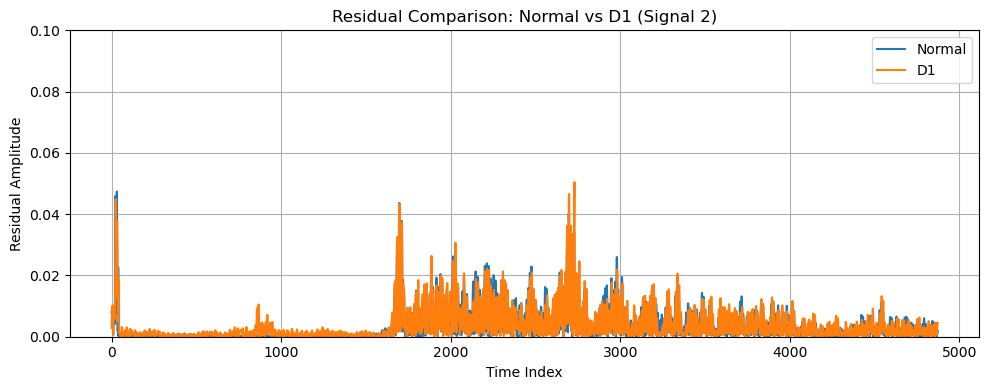

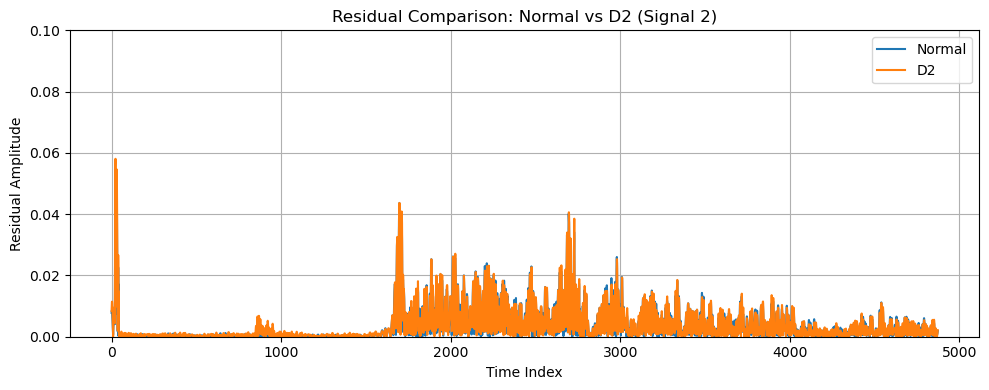

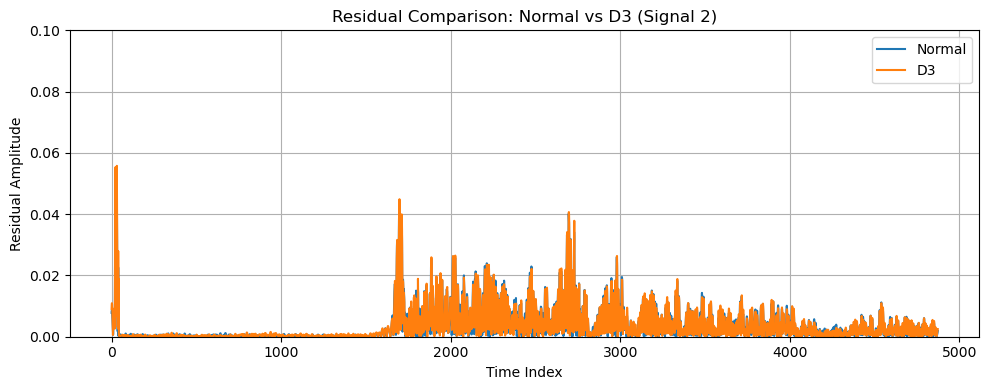

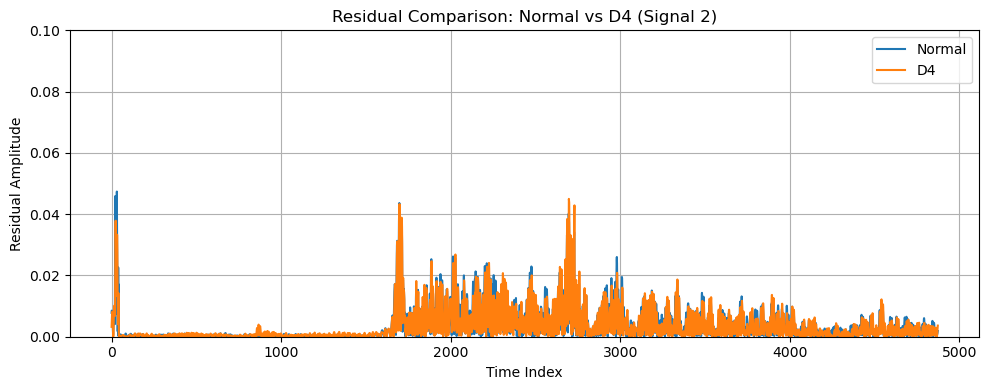

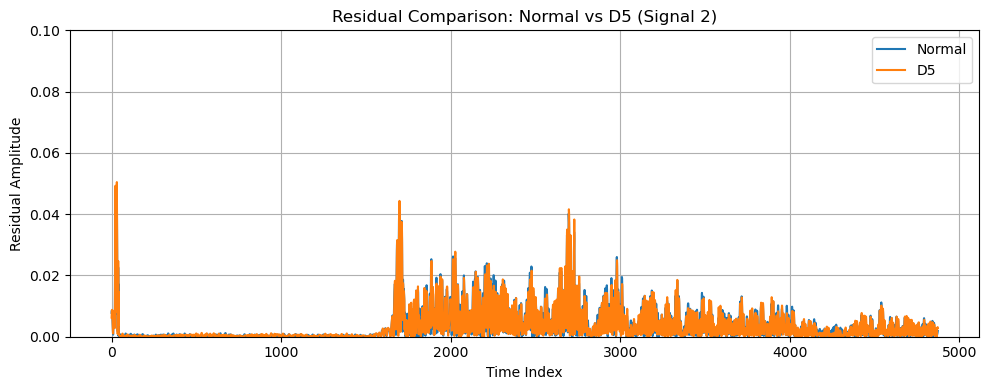

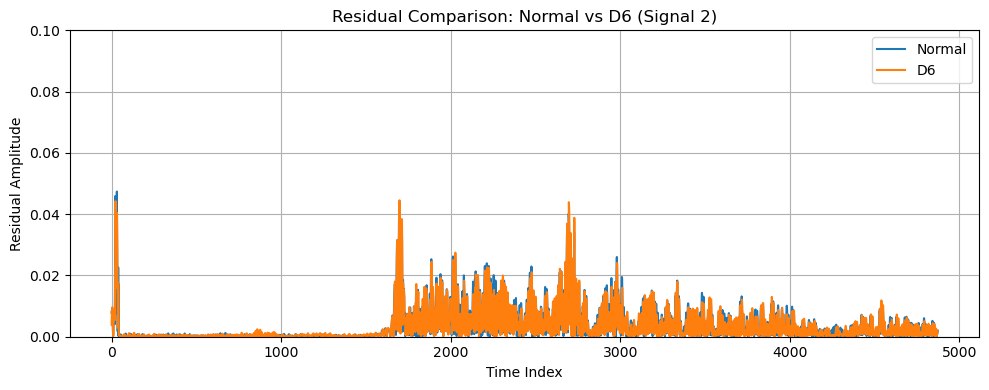

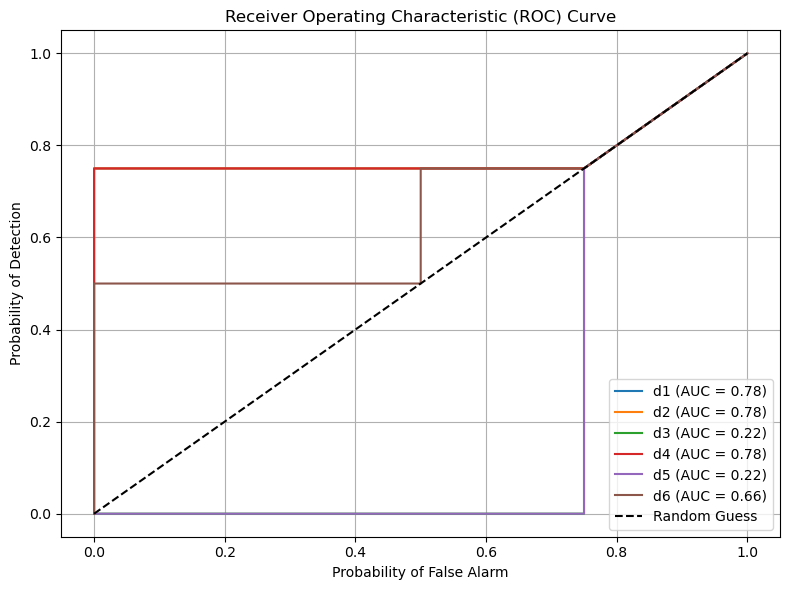

In [ ]:
#residual comparison
plt.figure(figsize=(10, 5))
signal_index = 1  # can change to 0、1、2 , 3

defects = [
    error_absolute_5db,
    error_absolute_10db,
    error_absolute_15db,
    error_absolute_20db,
    error_absolute_25db,
    error_absolute_30db
]
labels = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']

for i, (defect, label) in enumerate(zip(defects, labels), start=1):
    plt.figure(figsize=(10, 4))
    plt.plot(residual_absolute[:, signal_index], label='Normal', linewidth=1.5)
    plt.plot(defect[:, signal_index], label=f'{label}', linewidth=1.5)
    plt.ylim([0, 0.1])
    plt.xlabel("Time Index")
    plt.ylabel("Residual Amplitude")
    plt.title(f"Residual Comparison: Normal vs {label} (Signal {signal_index + 1})")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 3. ROC 
plt.figure(figsize=(8,6))
plt.plot(PFA_5db, POD_5db, label='d1 (AUC = %.2f)' % roc_auc_5db)
plt.plot(PFA_10db, POD_10db, label='d2 (AUC = %.2f)' % roc_auc_10db)
plt.plot(PFA_15db, POD_15db, label='d3 (AUC = %.2f)' % roc_auc_15db)
plt.plot(PFA_20db, POD_20db, label='d4 (AUC = %.2f)' % roc_auc_20db)
plt.plot(PFA_25db, POD_25db, label='d5 (AUC = %.2f)' % roc_auc_25db)
plt.plot(PFA_30db, POD_30db, label='d6 (AUC = %.2f)' % roc_auc_30db)
plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('Probability of False Alarm')
plt.ylabel('Probability of Detection')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def evaluate_mse_mae(residual_absolute, *defect_errors):
    print(" MSE / MAE result：")
    mse_normal = np.mean(residual_absolute ** 2)
    mae_normal = np.mean(np.abs(residual_absolute))
    print(f"Normal → MSE: {mse_normal:.6f}, MAE: {mae_normal:.6f}")

    for i, defect in enumerate(defect_errors, start=1):
        mse = np.mean(defect ** 2)
        mae = np.mean(np.abs(defect))
        print(f"Defect d{i} → MSE: {mse:.6f}, MAE: {mae:.6f}")


print("Final Evaluation Results")
print(f"Test MSE: {metrics[0]:.6f}")
print(f"AUC  d1: {roc_auc_5db:.8f}")
print(f"AUC d2: {roc_auc_10db:.8f}")
print(f"AUC d3: {roc_auc_15db:.8f}")
print(f"AUC d4: {roc_auc_20db:.8f}")
print(f"AUC d5: {roc_auc_25db:.8f}")
print(f"AUC d6: {roc_auc_30db:.8f}")

evaluate_mse_mae(residual_absolute,
                 error_absolute_5db,
                 error_absolute_10db,
                 error_absolute_15db,
                 error_absolute_20db,
                 error_absolute_25db,
                 error_absolute_30db)



Final Evaluation Results
Test MSE: 0.781250
AUC  d1: 0.78125000
AUC d2: 0.78125000
AUC d3: 0.21875000
AUC d4: 0.78125000
AUC d5: 0.21875000
AUC d6: 0.65625000
 MSE / MAE result：
Normal → MSE: 0.000037, MAE: 0.003119
Defect d1 → MSE: 0.000039, MAE: 0.003428
Defect d2 → MSE: 0.000039, MAE: 0.003267
Defect d3 → MSE: 0.000038, MAE: 0.003176
Defect d4 → MSE: 0.000036, MAE: 0.003122
Defect d5 → MSE: 0.000037, MAE: 0.003113
Defect d6 → MSE: 0.000037, MAE: 0.003107
